In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [2]:
DATASET_PATH = "./"   # Notebook is already inside Assignmentdl2

IMG_SIZE = 128
data = []
labels = []

for label, person in enumerate(["Happy", "Sad"]):  # lowercase matches folders
    folder_path = os.path.join(DATASET_PATH, person)
    
    for img_file in os.listdir(folder_path):
        if img_file.lower().endswith((".jpg",".jpeg",".png")):
            img_path = os.path.join(folder_path, img_file)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img = img_to_array(img) / 255.0
            data.append(img)
            labels.append(label)

print("Total images loaded =", len(labels))


Total images loaded = 6


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Convert lists → numpy arrays (if not already)
data   = np.array(data, dtype="float32")
labels = np.array(labels, dtype="int32")

x_train, x_test, y_train_raw, y_test_raw = train_test_split(
    data, labels, test_size=0.25, random_state=42, shuffle=True
)

# One-hot encoding (2 classes: modi, trump)
y_train = to_categorical(y_train_raw, num_classes=2)
y_test  = to_categorical(y_test_raw,  num_classes=2)

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape,  y_test.shape)


Train: (4, 128, 128, 3) (4, 2)
Test : (2, 128, 128, 3) (2, 2)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_model(img_size=128):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')   # 2 classes: modi, trump
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

model = build_model(IMG_SIZE)
model.summary()


C:\Users\RAGHAV ANIL BHISE\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,794 (12.61 MB)

 Trainable params: 3,305,346 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,          # you can increase if GPU/CPU allows
    batch_size=16,
    verbose=1
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 1.6420 - val_accuracy: 1.0000 - val_loss: 0.5774
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6667 - loss: 12.2295 - val_accuracy: 0.0000e+00 - val_loss: 0.7293
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 1.3814e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.8181
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6667 - loss: 4.6417 - val_accuracy: 0.0000e+00 - val_loss: 0.8498
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8902
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.9326
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.9853
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.6667 - loss: 18.

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Test loss    : {test_loss:.4f}")


Test accuracy: 100.00%
Test loss    : 0.0050


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


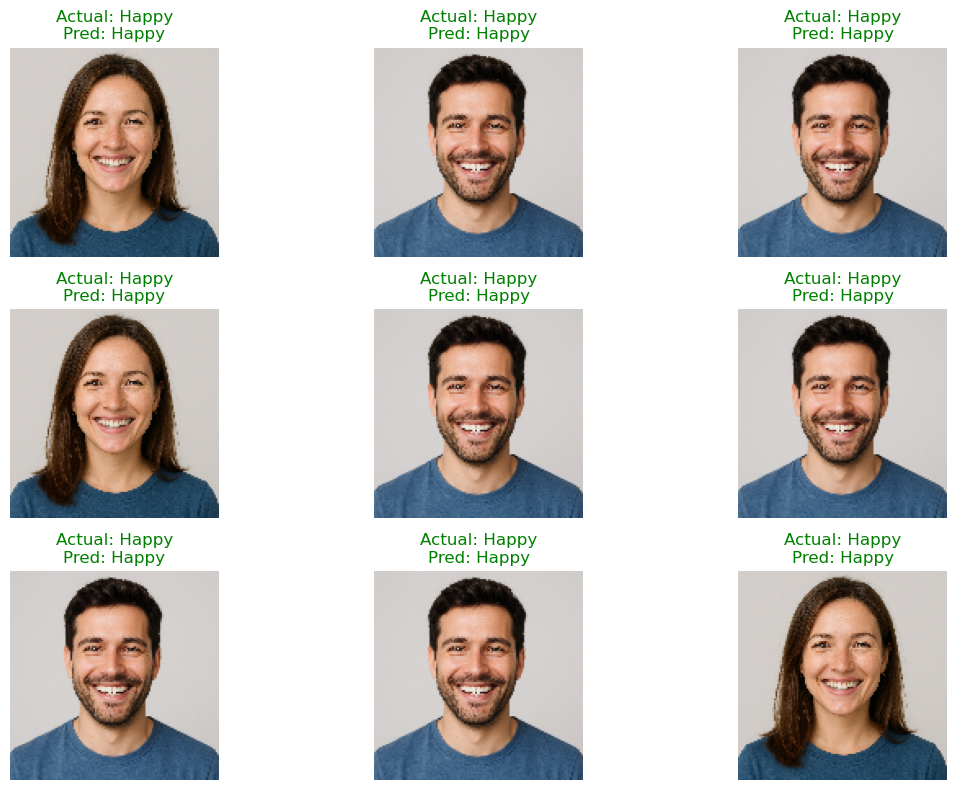

In [7]:
import matplotlib.pyplot as plt

class_names = ["Happy", "Sad"]

# Get predictions
pred_probs   = model.predict(x_test)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test,      axis=1)

# Show 9 random images with labels
plt.figure(figsize=(12,8))
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    img = x_test[idx]

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')

    actual_label    = class_names[true_classes[idx]]
    predicted_label = class_names[pred_classes[idx]]

    color = "green" if true_classes[idx] == pred_classes[idx] else "red"
    plt.title(f"Actual: {actual_label}\nPred: {predicted_label}", color=color)

plt.tight_layout()
plt.show()


Found 286 files belonging to 2 classes.
Using 215 files for training.
Found 286 files belonging to 2 classes.
Using 71 files for validation.


C:\Users\RAGHAV ANIL BHISE\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 369ms/step - accuracy: 0.5907 - loss: 0.9710 - val_accuracy: 0.5775 - val_loss: 0.6153
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.8093 - loss: 0.4191 - val_accuracy: 0.8592 - val_loss: 0.3801
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - accuracy: 0.9163 - loss: 0.2373 - val_accuracy: 0.7887 - val_loss: 0.6650
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - accuracy: 0.9628 - loss: 0.1476 - val_accuracy: 0.8873 - val_loss: 0.3280
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 0.9488 - loss: 0.1571 - val_accuracy: 0.8873 - val_loss: 0.2590
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.9953 - loss: 0.0366 - val_accuracy: 0.8732 - val_loss: 0.4462
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 334ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.8592 - val_loss: 0.7086
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0

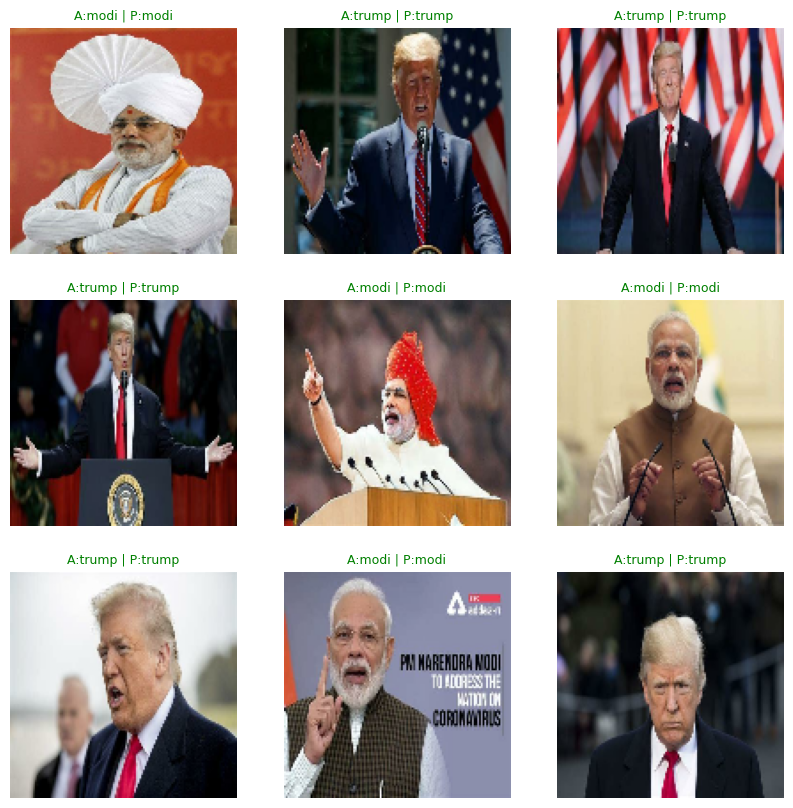

In [2]:
# ==== YOU MUST EDIT THESE TWO LINES ONLY ====
DATASET_PATH = "./"      # Folder containing class folders
CLASSES = ["modi", "trump"]         # Choose any 2 folders inside dataset
# Example: CLASSES=["happy","sad"] , CLASSES=["cat","dog"] , etc.
# ============================================

import os, tensorflow as tf, matplotlib.pyplot as plt

IMG_SIZE = 128
BATCH = 16

# ===== 1. Load only selected class folders =====
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    labels="inferred",
    class_names=CLASSES,       # <-- Only these folders will be used
    subset="training",
    validation_split=0.25,
    seed=42,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    labels="inferred",
    class_names=CLASSES,
    subset="validation",
    validation_split=0.25,
    seed=42,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH
)

# Normalize images
train_ds = train_ds.map(lambda x,y:(x/255,y))
test_ds  = test_ds.map(lambda x,y:(x/255,y))

# ===== 2. Minimal CNN Model =====
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")  # Binary classes
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

# ===== 3. Test Accuracy =====
loss,acc = model.evaluate(test_ds,verbose=0)
print("\nTest Accuracy:",round(acc*100,2),"%")

# ===== 4. Show Actual vs Predicted =====
images,labels = next(iter(test_ds))
pred = tf.argmax(model.predict(images),axis=1)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    actual = CLASSES[int(labels[i])]
    predicted = CLASSES[int(pred[i])]
    color = "green" if actual==predicted else "red"
    plt.title(f"A:{actual} | P:{predicted}",color=color,fontsize=9)
    plt.axis("off")
plt.show()
